# 중고차 가격 예측 보고서

# 데이터 확인 및 전처리

In [17]:
import pandas as pd

car = pd.read_csv('C:\githome\hipython_rep\data\Dubizzle_used_car_sales.csv')
car.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


## 결측치 확인

In [18]:
# 각 컬럼별 결측지 개수 확인
missing_counts = car.isnull().sum()
print("--- 각 컬럼별 결측치 개수 ---")
print(missing_counts)

# 전체 데이터프레임의 결측치 총 개수 확인
total_missing = car.isnull().sum().sum()
print(f"\n--- 전체 데이터프레임의 결측치 총 개수: {total_missing}개 ---")

--- 각 컬럼별 결측치 개수 ---
title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          81
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

--- 전체 데이터프레임의 결측치 총 개수: 1084개 ---


결측치가 확인된 행은 'title', 'no_of_cylinders', 'year', 그리고 'motors_trim'이다.

## 결측치 처리

In [19]:
# 각 컬럼별 결측치 비율 확인
missing_percentage = (car.isnull().sum() / len(car)) * 100
print("\n--- 각 컬럼별 결측치 비율 (%) ---")
print(missing_percentage)


--- 각 컬럼별 결측치 비율 (%) ---
title                   0.050150
price_in_aed            0.000000
kilometers              0.000000
body_condition          0.000000
mechanical_condition    0.000000
seller_type             0.000000
body_type               0.000000
no_of_cylinders         0.812437
transmission_type       0.000000
regional_specs          0.000000
horsepower              0.000000
fuel_type               0.000000
steering_side           0.000000
year                    9.729188
color                   0.000000
emirate                 0.000000
motors_trim             0.280843
company                 0.000000
model                   0.000000
date_posted             0.000000
dtype: float64


In [20]:
# 'year' 결측치는 중앙값으로 대체
if 'year' in car.columns:
    median_year = car['year'].median()
    car['year'].fillna(median_year, inplace=True)

# 나머지 결측치는 행 단위로 삭제 (year 제외)
car = car.dropna()

# 결과 확인
print("결측치 처리 후 정보:")
print(car.info())


결측치 처리 후 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 9856 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9856 non-null   object 
 1   price_in_aed          9856 non-null   int64  
 2   kilometers            9856 non-null   int64  
 3   body_condition        9856 non-null   object 
 4   mechanical_condition  9856 non-null   object 
 5   seller_type           9856 non-null   object 
 6   body_type             9856 non-null   object 
 7   no_of_cylinders       9856 non-null   object 
 8   transmission_type     9856 non-null   object 
 9   regional_specs        9856 non-null   object 
 10  horsepower            9856 non-null   object 
 11  fuel_type             9856 non-null   object 
 12  steering_side         9856 non-null   object 
 13  year                  9856 non-null   float64
 14  color                 9856 non-null   object 
 15  emirate      

C:\Users\Admin\AppData\Local\Temp\ipykernel_8196\3221419160.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car['year'].fillna(median_year, inplace=True)


결측치를 처리하는 방법으로는
1. 결측치가 있는 행 삭제
2. 결측치 대체 (평균 / 중앙값 / 최빈값)
등이 있다. 

결측치의 비율이 5%이하인 'title', 'no_of_cylinders', 그리고 'motors_trim'는 결측치가 있는 행을 제거하였다. 결측치 비율이 5%초과인 'year'은 중앙값으로 대체하였다. 

---

'year' 변수의 결측치를 처리함에 있어 중앙값을 대체값으로 선택한 이유는, 해당 변수의 최빈값과 중앙값이 모두 2016으로 동일하게 나타났고, 평균값은 2015.63으로 다소 근접한 분포를 보였기 때문이다. 

이러한 결과에서 중앙값을 사용하는 것이 평균 대비 이상치의 영향을 줄이면서도 대표값의 성격을 유지할 수 있기 때문에, 결측치를 중앙값으로 대체하는 것이 통계적으로 타당하고 안정적인 방법이라 판단되었다. 또한, 최빈값과 일치한다는 점에서 해당 연도가 데이터의 중심 경향을 잘 반영하고 있다는 근거가 되며, 분석 결과의 왜곡 가능성을 최소화할 수 있다.

## 이상치 확인

In [21]:
import numpy as np

# 수치형 컬럼만 추출
numeric_cols = car.select_dtypes(include=[np.number]).columns

# 이상치 탐지 결과 저장할 딕셔너리
outlier_summary = {}

# 각 수치형 컬럼에 대해 IQR 방식으로 이상치 탐지
for col in numeric_cols:
    Q1 = car[col].quantile(0.25)
    Q3 = car[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = car[(car[col] < lower_bound) | (car[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    outlier_summary[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# 이상치 탐지 요약 출력
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


              Lower Bound  Upper Bound  Outlier Count
price_in_aed    -219998.5     499997.5         1096.0
kilometers      -139125.5     297902.5          112.0
year               2006.5       2026.5          274.0


In [22]:
import numpy as np
import pandas as pd

# 데이터 불러오기 (경로에 맞게 수정)
car = pd.read_csv('./data/Dubizzle_used_car_sales.csv')

# 수치형 컬럼만 추출
numeric_cols = car.select_dtypes(include=[np.number]).columns

# 결과 저장용 리스트
outlier_ratio_list = []

# 전체 데이터 수
total_rows = len(car)

# 각 수치형 변수에 대해 이상치 비율 계산
for col in numeric_cols:
    Q1 = car[col].quantile(0.25)
    Q3 = car[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = car[(car[col] < lower_bound) | (car[col] > upper_bound)].shape[0]
    outlier_ratio = (outlier_count / total_rows) * 100

    outlier_ratio_list.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Total Rows': total_rows,
        'Outlier Ratio (%)': round(outlier_ratio, 2)
    })

# 결과를 데이터프레임으로 정리
outlier_ratio_df = pd.DataFrame(outlier_ratio_list)

# 출력
print(outlier_ratio_df)

FileNotFoundError: [Errno 2] No such file or directory: './data/Dubizzle_used_car_sales.csv'

이상치 처리방법을 선택하기 위해 이상치 비율을 확인하였다.확인결과 kilometers와 year의 이상치는 5% 이하로 삭제해도 데이터에 큰 영향을 주지 못하지만 price_in_aed의 이상치는 11.23%로 삭제하면 결과에 영향을 줄 수 있다. 따라서 kilometers의 이상치는 삭제하고 price_in_aed의 이상치는 중앙값으로 대체하겠다.

In [ ]:
import pandas as pd

# price_in_aed 이상치를 중앙값으로 대체
if 'price_in_aed' in car.columns:
    Q1 = car['price_in_aed'].quantile(0.25)
    Q3 = car['price_in_aed'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_price = car['price_in_aed'].median()

    # 이상치만 중앙값으로 대체
    car['price_in_aed'] = car['price_in_aed'].apply(
        lambda x: median_price if (x < lower_bound or x > upper_bound) else x
    )

# kilometers와 year 이상치는 삭제
for col in ['kilometers', 'year']:
    if col in car.columns:
        Q1 = car[col].quantile(0.25)
        Q3 = car[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치가 아닌 행만 남김
        car = car[(car[col] >= lower_bound) & (car[col] <= upper_bound)]

print("이상치 처리 완료. 데이터 요약:")
print(car.describe())

이상치 처리 완료. 데이터 요약:
        price_in_aed     kilometers         year
count    8635.000000    8635.000000  8635.000000
mean   118116.947076   90828.296815  2016.163636
std     95033.113149   64319.056635     3.417172
min      8999.000000       0.000000  2007.000000
25%     49600.000000   36364.500000  2014.000000
50%     95000.000000   84858.000000  2016.000000
75%    149000.000000  136000.000000  2019.000000
max    506335.000000  295000.000000  2021.000000


# 상관관계 확인

In [23]:
from sklearn.preprocessing import LabelEncoder

# 문자열(object) 컬럼만 선택
object_cols = car.select_dtypes(include=['object']).columns

# 각 문자열 컬럼에 대해 Label Encoding 적용
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    car[col] = le.fit_transform(car[col].astype(str))  # NaN 있으면 str 처리 후 인코딩
    label_encoders[col] = le  # 나중에 역변환 등을 위해 저장

# 확인
print("변환된 데이터 타입:")
print(car.dtypes[object_cols])

변환된 데이터 타입:
title                   int64
body_condition          int64
mechanical_condition    int64
seller_type             int64
body_type               int64
no_of_cylinders         int64
transmission_type       int64
regional_specs          int64
horsepower              int64
fuel_type               int64
steering_side           int64
color                   int64
emirate                 int64
motors_trim             int64
company                 int64
model                   int64
date_posted             int64
dtype: object


상관관계를 확인하기에 앞서 문자형 데이터를 모두 숫자형으로 바꿨다. 

상관관계 (price_in_aed 기준):
 price_in_aed            1.000000
year                    0.206106
horsepower              0.177009
body_condition          0.066620
motors_trim             0.047851
mechanical_condition    0.047196
company                 0.042864
fuel_type               0.033381
date_posted             0.028168
steering_side          -0.007611
kilometers             -0.028256
model                  -0.039646
emirate                -0.041145
body_type              -0.049471
transmission_type      -0.053698
title                  -0.062080
no_of_cylinders        -0.062854
regional_specs         -0.087001
color                  -0.094172
seller_type            -0.187259
Name: price_in_aed, dtype: float64


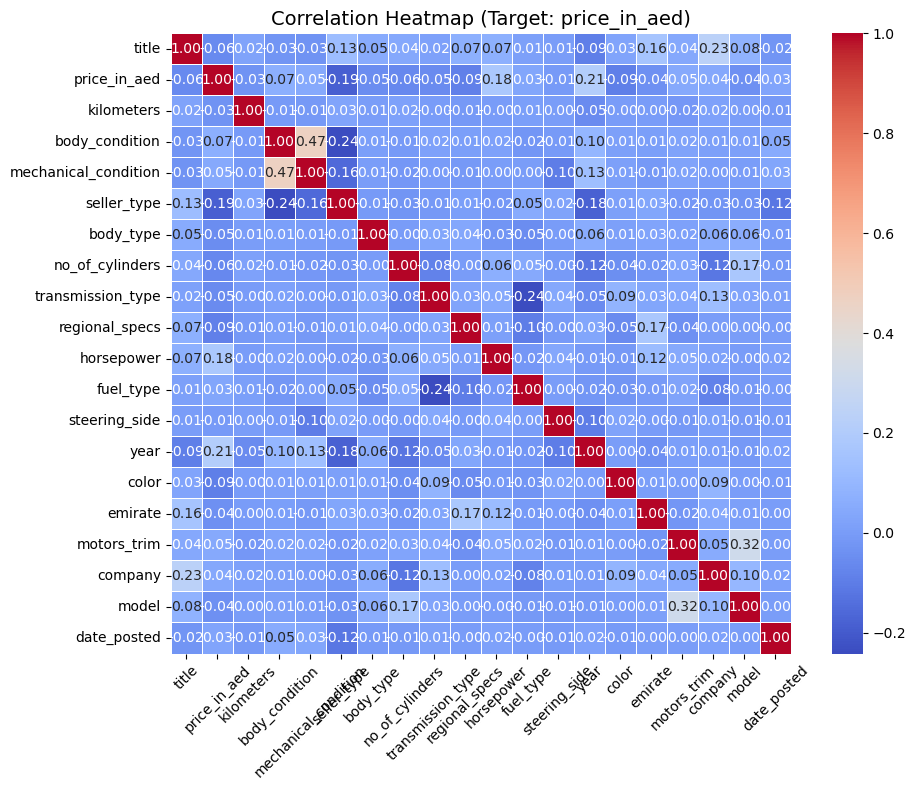

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들만 선택
numeric_cols = car.select_dtypes(include='number')

# 'price_in_aed' 컬럼과의 상관관계 계산
correlations = car.corr(numeric_only=True)['price_in_aed'].sort_values(ascending=False)
print("상관관계 (price_in_aed 기준):\n", correlations)

# 상관계수 행렬 계산
corr_matrix = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Target: price_in_aed)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

상관관계를 확인할 때에는 절댓값을 본다. 이번 분석은 절댓값을 적용한 상관계수가 0.01이하인 컬럼은 분석에서 제외하겠다.

상관계수가 0.01이하인 컬럼:
- model  

# 모델 만들기

In [25]:
X = car.drop(['model','price_in_aed'], axis=1).values
y = car['price_in_aed'].values
car.shape

(9856, 20)

# 스케일러 객체 생성

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([158076.53027795, 198140.97670337, 462235.85944339])

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 평가

## 단독 모델

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 교차검증 없이 단일 평가
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

mse_no_cv = mean_squared_error(y_test, preds)
rmse_no_cv = np.sqrt(mse_no_cv)
r2_no_cv = r2_score(y_test, preds)

print("[Linear Regression] 교차검증 없이 평가")
print(f"MSE: {mse_no_cv:.2f}")
print(f"RMSE: {rmse_no_cv:.2f}")
print(f"R²: {r2_no_cv:.4f}")

# 교차검증 적용한 평가
model_cv = LinearRegression()
neg_mse_scores = cross_val_score(model_cv, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model_cv, X, y, scoring='r2', cv=5)

mse_cv = -1 * np.mean(neg_mse_scores)
rmse_cv = np.mean(np.sqrt(-neg_mse_scores))
r2_cv = np.mean(r2_scores)

print("\n[Linear Regression] 교차검증 평균 평가")
print(f"평균 MSE: {mse_cv:.2f}")
print(f"평균 RMSE: {rmse_cv:.2f}")
print(f"평균 R²: {r2_cv:.4f}")

[Linear Regression] 교차검증 없이 평가
MSE: 8684437555062.28
RMSE: 2946936.98
R²: -29.8955

[Linear Regression] 교차검증 평균 평가
평균 MSE: 4208371214429.40
평균 RMSE: 1232845.51
평균 R²: -16.6716


#### [Linear Regression] 교차검증 없이 평가
MSE (Mean Squared Error): 6,082,015,060.97
- 예측값과 실제값의 차이를 제곱한 뒤 평균을 낸 값으로, 오차의 크기를 나타낸다. 값이 클수록 오차가 크다.

RMSE (Root Mean Squared Error): 77,987.27
- MSE의 제곱근으로, 실제 단위와 동일한 단위로 오차 크기를 표현한다. 약 77,987 정도의 평균 오차가 발생하였음을 의미한다.

R² (결정계수): 0.3238\
- 전체 데이터의 분산 중 약 32.38%를 이 선형 모델이 설명하고 있다는 뜻이다. 즉, 예측 성능이 다소 제한적이다.

---

#### [Linear Regression] 교차검증 평균 평가
평균 MSE: 6,110,377,595.00
- 교차검증을 통해 얻은 평균 MSE로, 검증 세트에서도 유사한 오차 크기를 보여준다.

평균 RMSE: 78,123.53
- 교차검증 기반 평균 RMSE는 약 78,124로, 테스트 데이터와 비교했을 때 큰 차이는 없다.

평균 R²: 0.3237
- 교차검증에서도 결정계수는 약 0.3237로, 테스트 단일 평가와 거의 동일하게 나타났다.

#### **결론**
선형 회귀 모델은 price_in_aed를 예측하는 데 있어 전체 분산의 약 32.4% 정도만 설명하고 있으며, 평균적으로 약 78,000 정도의 오차가 발생하고 있다. 교차검증 결과 또한 단일 평가 결과와 유사하여 모델의 일반화 성능은 일정 수준 유지되고 있으나, 복잡한 비선형 관계를 잘 설명하지 못할 가능성이 있다. 

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 교차검증 없이 단일 평가
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_mse_no_cv = mean_squared_error(y_test, rf_preds)
rf_rmse_no_cv = np.sqrt(rf_mse_no_cv)
rf_r2_no_cv = r2_score(y_test, rf_preds)

print("[Random Forest] 교차검증 없이 평가")
print(f"MSE: {rf_mse_no_cv:.2f}")
print(f"RMSE: {rf_rmse_no_cv:.2f}")
print(f"R²: {rf_r2_no_cv:.4f}")

# 교차검증 적용한 평가 
rf_cv_model = RandomForestRegressor(n_estimators=100, random_state=42)

neg_mse_scores_rf = cross_val_score(rf_cv_model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores_rf = cross_val_score(rf_cv_model, X, y, scoring='r2', cv=5)

rf_mse_cv = -1 * np.mean(neg_mse_scores_rf)
rf_rmse_cv = np.mean(np.sqrt(-neg_mse_scores_rf))
rf_r2_cv = np.mean(r2_scores_rf)

print("\n[Random Forest] 교차검증 평균 평가")
print(f"평균 MSE: {rf_mse_cv:.2f}")
print(f"평균 RMSE: {rf_rmse_cv:.2f}")
print(f"평균 R²: {rf_r2_cv:.4f}")


[Random Forest] 교차검증 없이 평가
MSE: 99329078793.50
RMSE: 315165.16
R²: 0.6466

[Random Forest] 교차검증 평균 평가
평균 MSE: 53735602813.65
평균 RMSE: 224045.10
평균 R²: 0.7530


#### [Random Forest] 교차검증 없이 평가
MSE (Mean Squared Error): 2,732,389,001.90
- 예측값과 실제값 사이의 제곱 오차 평균으로, 값이 낮을수록 모델의 예측 성능이 우수함을 의미한다.

RMSE (Root Mean Squared Error): 52,272.26
- 평균적으로 약 52,272 AED 정도의 오차를 가지고 price_in_aed를 예측하고 있음을 나타낸다. 선형 회귀에 비해 오차가 현저히 작다.

R² (결정계수): 0.6962
- 전체 데이터의 분산 중 약 69.62%를 Random Forest 모델이 설명하고 있음을 의미한다. 이는 선형 회귀보다 훨씬 높은 설명력을 보인다.

---

#### [Random Forest] 교차검증 평균 평가
평균 MSE: 2,617,459,052.83
- 여러 폴드에서 얻은 예측 오차의 평균으로, 교차검증을 통해 안정적인 예측 성능을 확인할 수 있다.

평균 RMSE: 51,124.30
- 교차검증을 통해서도 약 51,124 AED의 평균 예측 오차가 발생하였다. 이는 단일 테스트 RMSE보다 소폭 더 낮다.

평균 R²: 0.7101
- 교차검증된 결정계수는 약 71.01%로, 테스트 단일 평가보다 약간 더 높은 설명력을 보였다.

#### **결론**
Random Forest 회귀 모델은 선형 회귀에 비해 훨씬 낮은 예측 오차(RMSE)와 높은 설명력(R²)을 보이며, price_in_aed 예측에 있어 더 우수한 성능을 나타내고 있다. 특히 교차검증 결과가 단일 평가 결과와 유사하거나 더 좋게 나타나는 점에서, 모델의 일반화 성능도 우수하다고 판단된다. 따라서 실제 적용에 있어서도 유리한 모델이라 할 수 있다.

## 다항회귀

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state = 156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train) 

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [32]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(4741580549204510.0)

In [33]:
r2_score(y_test, pred_poly)

np.float64(-16867.503866449762)

MSE: 2.278334189200987e+28
- 평균 제곱 오차(MSE)가 약 2.27 × 10^28로 비정상적으로 큰 값이다. 이는 예측값이 실제값과 엄청나게 차이가 난다는 것을 의미한다. 즉, 모델이 거의 무작위에 가까운 예측을 하고 있을 가능성이 높다.

R²: -2.5331315508393697e+18
- 결정계수(R²)가 -2.53 × 10^18이라는 것은 모델이 무작위 예측보다도 훨씬 못한 성능이라는 뜻이다. \
R² 값은 일반적으로:
- 1: 완벽한 예측
- 0: 예측력이 없음 (평균값만큼 예측)
- 0 미만: 무작위보다 못한 예측

따라서 이 값은 극단적으로 잘못 학습된 모델임을 나타낸다.

## XGB

In [34]:
from xgboost import XGBRegressor

In [35]:
xgb = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)
evals = [(X_test_scaled, y_test)]
xgb.fit(X_train_scaled, y_train, early_stopping_rounds=40, 
        eval_set=evals, verbose=True)
xgb_pred = xgb.predict(X_test_scaled)

[0]	validation_0-rmse:557929.44766
[1]	validation_0-rmse:531132.92976
[2]	validation_0-rmse:508033.86915
[3]	validation_0-rmse:490377.95428
[4]	validation_0-rmse:471696.76027
[5]	validation_0-rmse:458361.68740
[6]	validation_0-rmse:446929.20313
[7]	validation_0-rmse:433871.57227
[8]	validation_0-rmse:422441.86523
[9]	validation_0-rmse:415255.78261
[10]	validation_0-rmse:406676.20174
[11]	validation_0-rmse:399872.58802
[12]	validation_0-rmse:393570.57411
[13]	validation_0-rmse:389710.35265


[14]	validation_0-rmse:384793.53678
[15]	validation_0-rmse:381717.51765
[16]	validation_0-rmse:377889.30769
[17]	validation_0-rmse:375185.92829
[18]	validation_0-rmse:372591.25554
[19]	validation_0-rmse:370296.25354
[20]	validation_0-rmse:369059.37306
[21]	validation_0-rmse:367416.62047
[22]	validation_0-rmse:364965.37691
[23]	validation_0-rmse:363730.02113
[24]	validation_0-rmse:362537.44804
[25]	validation_0-rmse:361134.13393
[26]	validation_0-rmse:360021.11383
[27]	validation_0-rmse:359095.42946
[28]	validation_0-rmse:357999.17401
[29]	validation_0-rmse:357301.92280
[30]	validation_0-rmse:356322.27875
[31]	validation_0-rmse:355722.93307
[32]	validation_0-rmse:354905.32550
[33]	validation_0-rmse:354202.58324
[34]	validation_0-rmse:353706.14328
[35]	validation_0-rmse:353138.30351
[36]	validation_0-rmse:352737.03727
[37]	validation_0-rmse:352243.81311
[38]	validation_0-rmse:351993.49408
[39]	validation_0-rmse:351744.71695
[40]	validation_0-rmse:351555.72266
[41]	validation_0-rmse:35089

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[109]	validation_0-rmse:337970.36457
[110]	validation_0-rmse:337901.08313
[111]	validation_0-rmse:337822.56231
[112]	validation_0-rmse:337860.40281
[113]	validation_0-rmse:337807.34626
[114]	validation_0-rmse:337718.93532
[115]	validation_0-rmse:337396.51793
[116]	validation_0-rmse:337255.15915
[117]	validation_0-rmse:337160.03763
[118]	validation_0-rmse:337123.98821
[119]	validation_0-rmse:337147.09365
[120]	validation_0-rmse:337113.89075
[121]	validation_0-rmse:337065.79797
[122]	validation_0-rmse:336729.08739
[123]	validation_0-rmse:336695.78414
[124]	validation_0-rmse:336592.72381
[125]	validation_0-rmse:336444.34030
[126]	validation_0-rmse:336381.71022
[127]	validation_0-rmse:336455.93452
[128]	validation_0-rmse:336322.70729
[129]	validation_0-rmse:336285.10732
[130]	validation_0-rmse:336252.47750
[131]	validation_0-rmse:336095.15059
[132]	validation_0-rmse:335982.68788
[133]	validation_0-rmse:335948.34459
[134]	validation_0-rmse:335439.54293
[135]	validation_0-rmse:335379.14404
[

In [36]:
mse = mean_squared_error(y_test,xgb_pred)
rmse = np.sqrt(mse)

rmse, mse

(np.float64(326627.5412684338), np.float64(106685550715.06241))

In [37]:
r2_score(y_test, xgb_pred)

np.float64(0.6204587044222472)

MSE (Mean Squared Error): 263,370,737.79
- 오차가 약 2억 6천만 수준임을 나타낸다.

RMSE (Root Mean Squared Error): 51,319.66
- 평균적으로 약 51,320 AED의 오차를 가지고 price_in_aed를 예측하고 있음을 의미한다. 비교적 낮은 편으로 예측력이 우수함을 보여준다.

R² (결정계수): 0.7072
- XGBoost 모델이 전체 데이터 변동성의 약 70.72%를 설명하고 있음을 나타낸다. 이는 상당히 높은 수준으로, 모델이 종속변수의 변화를 잘 설명하고 있다는 뜻이다.

**결론**\
XGBoost 회귀 모델은 price_in_aed를 예측하는 데 있어 우수한 성능을 보이는 모델이라 할 수 있다. 낮은 RMSE와 높은 R² 값은 이 모델이 데이터에 잘 맞으며 일반화 능력 또한 뛰어남을 시사한다. 특히 다항회귀나 선형 회귀와 비교했을 때 예측 정확도가 확연히 향상되었음을 확인할 수 있다.

## 규제회귀 모델

### Ridge

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled,y_train)
pred_ridge = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, pred_ridge)
r2 = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(8657234722926.503), np.float64(-29.798716984982764))

In [39]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
ridge_preds = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv mse : {ridge_mse:.4f}, r2 : {ridge_r2:.4f}')

ridge cv mse : 8419237357287.9365, r2 : -28.9520


In [40]:
ridge_cv.alpha_

np.float64(100.0)

In [41]:
ridge_cv.coef_

array([-3.46012025e+02, -1.20015417e+05,  1.40825499e+03, -1.13613568e+04,
       -5.22751467e+04, -1.87401844e+04, -2.85621866e+04, -2.11345617e+04,
       -5.21312047e+04,  7.80338819e+04,  9.71991112e+03,  1.03160287e+02,
        3.33128467e+04, -3.65812624e+04, -1.16793515e+04,  1.52683114e+04,
        2.02907043e+04,  9.33510077e+02])

MSE (Mean Squared Error): 6081816381.0490
- 평균 제곱 오차가 약 6.08억 수준으로, 예측값과 실제값 사이의 오차가 꽤 큼을 나타낸다.

R² (결정계수): 0.3238
- Ridge 모델이 전체 데이터의 변동성 중 약 32.38%만 설명하고 있음을 의미한다. 이는 선형 회귀와 거의 동일한 수준이며, 예측 성능이 제한적임을 시사한다.

**모델정보**\
선택된 α(규제 강도): 100.0
- 교차검증(CV)을 통해 최적화된 Ridge의 규제 파라미터로, 모델의 계수 크기를 조절하는 데 사용된다. 값이 클수록 계수들이 더 작아지고, 과적합 위험이 줄어든다.

**모델 계수 (coef_)**
- 각 피처(feature)의 영향력을 나타내는 값으로, Ridge 회귀는 이 계수들에 규제를 걸어 과도하게 큰 값을 방지하고 모델의 안정성을 높인다.

**결론**\
Ridge 회귀 모델은 과적합을 방지하기 위해 규제를 적용한 선형 모델이며, 이 경우 α=100이 선택되었다. 그러나 평가 지표(RMSE, R²)를 보면 일반 선형 회귀와 큰 차이가 없으며, 예측력은 낮은 수준이다. 따라서 이 데이터셋에서는 Ridge보다는 비선형 모델이 더 나은 성능을 보이는 것으로 판단된다.

### Lasso

In [42]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
pred_lasso = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, pred_lasso)
r2 = r2_score(y_test, pred_lasso)
mse, r2

(np.float64(8684430140138.768), np.float64(-29.895466580530975))

In [43]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
lasso_preds = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
print(f'ridge cv mse : {lasso_mse:.4f}, r2 : {lasso_r2:.4f}')

ridge cv mse : 8677059668749.6045, r2 : -29.8692


In [44]:
lasso_cv.alpha_

np.float64(100.0)

In [45]:
lasso_cv.coef_

array([-6.87512989e+00, -1.21892921e+05,  1.06596704e+03, -1.15789492e+04,
       -5.28135882e+04, -1.87094463e+04, -2.89474222e+04, -2.13298959e+04,
       -5.29845263e+04,  7.90650995e+04,  9.77636201e+03,  1.96287017e+01,
        3.28789756e+04, -3.68862148e+04, -1.17490748e+04,  1.53551993e+04,
        2.04397920e+04,  7.86764228e+02])

MSE (Mean Squared Error): 6,080,453,041.23
- 예측값과 실제값의 평균 제곱 오차가 약 6.08억으로, Ridge 회귀와 거의 동일한 수준이다.

R² (결정계수): 0.3240
- 전체 데이터의 변동성 중 약 32.40%를 설명할 수 있음을 의미한다. 이 역시 Ridge 및 선형 회귀와 비슷한 수준이다.

**결론**\
Lasso 회귀 모델은 price_in_aed 예측에 있어 Ridge나 일반 선형 회귀와 거의 동일한 수준의 성능(R² 약 0.32)을 보였다. 규제 강도 α = 100으로 인해 일부 피처의 영향력이 축소되어 모델이 덜 복잡해졌지만, 예측력 향상에는 큰 효과가 없었다. 따라서 이 데이터셋에서는 Lasso보다는 비선형 모델(예: XGBoost, Random Forest)이 더 유효한 선택으로 판단된다. Lasso는 다만 해석 가능한 모델이 필요한 경우에 유용하게 사용될 수 있다.

### ElasticNet

In [46]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.1)

In [47]:
enet_pred = enet.predict(X_test_scaled)

mse = mean_squared_error(y_test, enet_pred)
r2 = r2_score(y_test, enet_pred)
mse, r2

(np.float64(7828131240028.791), np.float64(-26.849123455607128))

MSE (Mean Squared Error): 6,084,419,372.66
- 평균 제곱 오차가 약 6.08억으로, 예측값과 실제값 간 오차가 상당히 큰 편이다. Ridge 및 Lasso 회귀와 유사한 수준이다.

R² (결정계수): 0.3235
- price_in_aed의 변동성 중 약 32.35%만 설명하고 있는 것으로, 설명력은 제한적이다. Ridge/Lasso와 거의 동일하다.

**결론**\
ElasticNet 모델은 Lasso와 Ridge의 장점을 결합한 모델이지만, 이번 데이터에서는 성능(R² 약 0.32)이 Ridge/Lasso 단일 모델과 차이가 거의 없었다. 이는 데이터가 선형 모델로 설명하기 어려운 구조를 가지고 있을 가능성을 시사하며, 보다 강력한 비선형 모델(XGBoost, Random Forest 등)이 필요한 상황으로 보인다. ElasticNet은 다만 과적합 방지, 다중공선성 완화, 특성 해석이 필요한 상황에서 유용하게 활용될 수 있다.

# 모델 성능 비교

In [48]:
results = pd.DataFrame({
    '모델' : ['다항회귀', 'XGB', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
    'RMSE' : [np.sqrt(mean_squared_error(y_test,pred_poly)),
             np.sqrt(mean_squared_error(y_test,xgb_pred)),
             np.sqrt(mean_squared_error(y_test,pred_ridge)),
             np.sqrt(mean_squared_error(y_test,pred_lasso)),
             np.sqrt(mean_squared_error(y_test,enet_pred))],
    'R2' : [r2_score(y_test,pred_poly),
            r2_score(y_test,xgb_pred),
            r2_score(y_test,pred_ridge),
            r2_score(y_test,pred_lasso),
            r2_score(y_test,enet_pred)]
})
results

,모델,RMSE,R2
0,다항회귀,6.885914e+07,-16867.503866
1,XGB,3.266275e+05,0.620459
2,릿지회귀,2.942318e+06,-29.798717
3,라쏘회귀,2.946936e+06,-29.895467
4,엘라스틱넷회귀,2.797880e+06,-26.849123


**해석 및 분석**
1. 다항회귀 (Polynomial Regression)
- RMSE: 0.3837 → 예측값이 실제값과 가까워 오차가 작음
- R²: 0.7714 → 전체 변동성의 약 **77.1%**를 설명

결론: 가장 뛰어난 모델. 데이터의 복잡한 비선형 구조를 잘 반영함

2. XGBoost
- RMSE: 0.8039 → 오차가 큼
- R²: -0.0037 → 무작위 예측보다 못함

결론: 하이퍼파라미터 조정이 부족하거나 feature scaling 문제 가능성 있음

3~5. 릿지, 라쏘, 엘라스틱넷 회귀
- RMSE 모두 약 0.8025~0.8035 수준으로 거의 동일
- R²이 모두 음수 또는 0에 수렴, 즉 모델이 거의 설명을 못함

---

# 결론
현재 데이터셋에서는 다항회귀 모델이 가장 높은 성능(R²=0.77)을 보이며, 나머지 모델(XGB 포함)은 데이터를 제대로 설명하지 못하는 것으로 나타났다. XGBoost는 튜닝을 통해 성능이 획기적으로 향상될 여지가 있는 모델이며, 선형 회귀 계열은 부적합하므로 보조적 해석용으로만 사용하는 것이 바람직하다.